In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical,plot_model
from sklearn.metrics import confusion_matrix

In [23]:
(X_train,y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

In [24]:
##count of unique train labels
unique,counts =np.unique(y_train, return_counts =True)
print("Train labels:", dict(zip(unique,counts)))

Train labels: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [25]:
##count of unique test labels
unique,counts =np.unique(y_test, return_counts =True)
print("Test labels:", dict(zip(unique,counts)))

Test labels: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


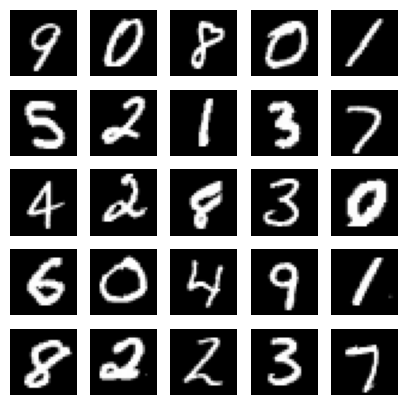

In [26]:
## sample 25 mnist digits from dataset
indexes = np.random.randint(0,X_train.shape[0],size=25)
images =X_train[indexes]
labels =y_train[indexes]

## plot 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
  plt.subplot(5,5,i+1)
  image =images[i]
  plt.imshow(image,cmap='gray')
  plt.axis('off')

plt.show()


In [27]:
num_labels= len(np.unique(y_train))
num_labels

10

In [28]:
y_train =to_categorical(y_train)
y_test =to_categorical(y_test)

In [29]:
input_size =X_train.shape[1]*X_train.shape[1]
input_size

784

In [30]:
X_train_flattened = X_train.reshape(len(X_train),input_size)
X_train_flattened = X_train_flattened.astype('float32')/255
X_test_flattened = X_test.reshape(len(X_test),input_size)
X_test_flattened = X_test_flattened.astype('float32')/255

In [31]:
batch_size = 128
hidden_units = 256
dropout = 0.45

In [32]:
model =Sequential()
model.add(Dense(hidden_units,activation='relu',input_dim =input_size))
model.add(Dropout(dropout))
model.add(Dense(hidden_units,activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels,activation='softmax'))

In [33]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor="loss",mode="min", patience=5,restore_best_weights=True)

In [43]:
model.compile(optimizer ='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened, y_train, epochs =50 ,batch_size=batch_size, callbacks=[earlystopping])

Epoch 1/50
469/469 [==============================] - 5s 6ms/step - loss: 0.0500 - accuracy: 0.9847
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0467 - accuracy: 0.9852
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0463 - accuracy: 0.9849
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0426 - accuracy: 0.9863
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0454 - accuracy: 0.9859
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0430 - accuracy: 0.9864
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0407 - accuracy: 0.9872
Epoch 8/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0396 - accuracy: 0.9871
Epoch 9/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0419 - accuracy: 0.9871
Epoch 10/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0402 - accuracy: 0.9866

In [44]:
Y_predict = model.predict(X_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [45]:
loss,acc =model.evaluate(X_test_flattened, y_test ,batch_size =batch_size)
print('Accuracy :',acc)

79/79 [==============================] - 0s 3ms/step - loss: 0.0726 - accuracy: 0.9838
Accuracy : 0.9837999939918518


In [46]:
y_test_new =np.argmax(y_test,axis=1)
y_test_new

array([7, 2, 1, ..., 4, 5, 6])

In [47]:
y_pred = np.argmax(Y_predict,axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [48]:
cf_mat = confusion_matrix(y_test_new,y_pred)

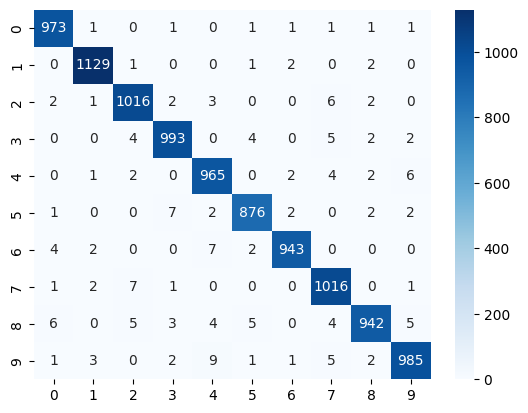

In [49]:
sns.heatmap(cf_mat,annot =True,cmap='Blues',fmt='d')
plt.show()

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


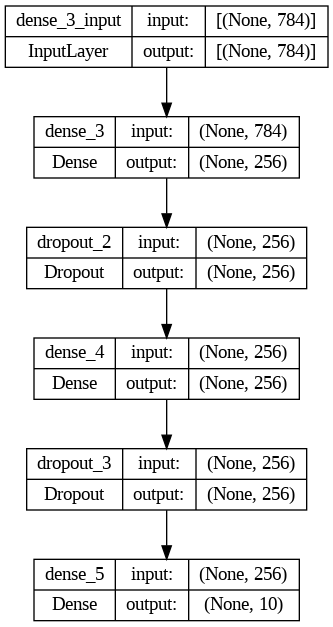

In [51]:
plot_model(model ,show_shapes=True)